**Q1. Problem Statement: Boosting Models with AdaBoost**

The ‘seeds.csv’ dataset contains the data about the various characteristics of wheat seeds, the ‘Type’ column consisit of three unique values, 1, 2, 3, which are classified based on the charecterstics of seeds entailing in other columns.

Load the ‘seeds.csv’ dataset into a DataFrame and considering the 'Type' column as target,  perform the following tasks:
1.	Analyze  the target column by printing it’s unique values
2.	Separate the feature vectors and the target variable
3.	Split the dataset into train and test sets in a 70:30 ratio
4.	Build a Decision Tree Classifier and a GaussianNB model and print their accuracy scores
5.	For the Decision Tree Classifier and a GaussianNB models boost the accuracy using AdaBoost Classifier and compare the accuracy scores with original models using a bar plot



**Step-1:** Importing the required libraries

In [1]:
#Import required libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

**Step-2:** Loading the CSV data into a DataFrame.

In [2]:
data=pd.read_csv('seeds.csv')
data.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


**Step-3:** Looking for null values in the dataset.

In [3]:
data.shape

(199, 8)

In [4]:
data.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

**Step-4:** Considering the 'Type' column as target, analyzing the target column.

In [5]:
data.Type.unique()

array([1, 2, 3], dtype=int64)

In [6]:
target_ratio=pd.DataFrame({'Counts':data.Type.value_counts(),'Percentage':data.Type.value_counts()/len(data)})
target_ratio

,Counts,Percentage
Type,,
2,68,0.341709
1,66,0.331658
3,65,0.326633


**Step-5:** Seperating the feature vectors and the target variable.

In [7]:
X=data.drop(['Type'],axis=1)
y=data.Type

In [8]:
X.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [9]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

**Step-6:** Splitting the dataset into train and test sets.

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=8,test_size=0.3)

**Step-7:** Building a Decision Tree Classifier and printing the model accuracy.

In [11]:
dt_clf=DecisionTreeClassifier(max_depth=1)
dt_clf.fit(X_train,y_train)
dt_pred=dt_clf.predict(X_test)
acc_dt=round(accuracy_score(y_test,dt_pred),3)
print("Accuracy score of the Decision tree model is:")
print(acc_dt)

Accuracy score of the Decision tree model is:
0.583


**Step-8:** Building a  GaussianNB model and printing the accuracy.

In [12]:
gnb_model=GaussianNB()
gnb_model.fit(X_train,y_train)
gnb_pred=gnb_model.predict(X_test)
acc_gnb=round(accuracy_score(y_test,gnb_pred),3)
print("Accuracy score of the GaussianNB model is:")
print(acc_gnb)

Accuracy score of the GaussianNB model is:
0.933


**Step-9:** Building a Decision Tree Classifier model and using ADABoost to boost the accuracy of the model.

In [13]:
ada=AdaBoostClassifier(n_estimators=100,learning_rate=0.6)
ada.fit(X_train,y_train)
ada_pred=ada.predict(X_test)
acc_ada=round(accuracy_score(y_test,ada_pred),3)
print(acc_ada)

0.883


**Step-10:** Building a GauusianNB model and using ADABoost to boost the accuracy of the model.

In [14]:
ada_gnb=AdaBoostClassifier(base_estimator=GaussianNB(),n_estimators=100,learning_rate=0.5)
ada_gnb.fit(X_train,y_train)
agnb_pred=ada_gnb.predict(X_test)
acc_agnb=round(accuracy_score(y_test,agnb_pred),3)
print(acc_agnb)

C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.95


**Step-11:** Comparing the accuracies of the models with and without ADABost using a bar plot.

<BarContainer object of 4 artists>

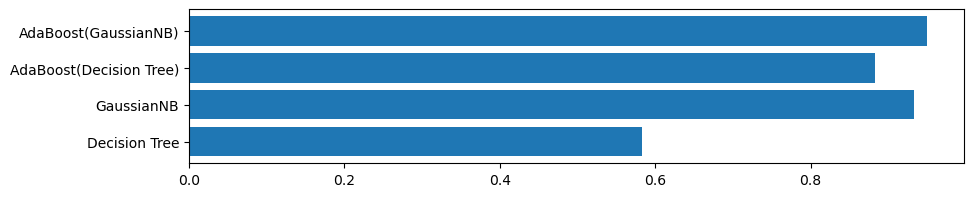

In [15]:
plt.figure(figsize=(10,2))
plt.barh(np.arange(4),[acc_dt,acc_gnb,acc_ada,acc_agnb],\
         tick_label=['Decision Tree','GaussianNB','AdaBoost(Decision Tree)','AdaBoost(GaussianNB)'])
